In [1]:
import pandas as pd
t=pd.read_csv('titanic.csv')

In [2]:
#Arithmetic Operation on a data Set

In [3]:
(t.sibsp+t.parch).head()

0    1
1    1
2    0
3    1
4    0
dtype: int64

In [4]:
#A Better method thats allows us to deal with Nan values
t.loc[::,'Family_member']=t.sibsp.add(t.parch,fill_value=0)
t.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,Family_member
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1


In [5]:
sales=pd.read_csv('sales.csv')
sales

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri
0,Steven,34,27,15,NaN,33
1,Mike,45,9,74,87.0,12
2,Andi,17,33,54,8.0,29
3,Paul,87,67,27,45.0,7


In [7]:
sales.Mon.add(sales.Thu,fill_value=0)# Adding sales of two particular days

0     34.0
1    132.0
2     25.0
3    132.0
dtype: float64

In [8]:
sales.loc[::,'taxper']=0.3

In [10]:
sales.loc[::,'tax_amt']=((sales.sum(axis=1,skipna=True)).mul(sales.taxper))
#Adding all vallues horizontally and conducting operations

In [11]:
sales

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri,taxper,tax_amt
0,Steven,34,27,15,NaN,33,0.3,42.627
1,Mike,45,9,74,87.0,12,0.3,88.647
2,Andi,17,33,54,8.0,29,0.3,55.107
3,Paul,87,67,27,45.0,7,0.3,90.987


In [12]:
#Other Arithmetic operations
t.drop(columns=['sibsp','parch','embarked','deck'],inplace=True)

In [13]:
t.loc[::,'food_cost']=((-t.fare).mul(0.3)).mul(-1)

In [14]:
t.head()#Our calculated basic food cost(30% of fare)


,survived,pclass,sex,age,fare,Family_member,food_cost
0,0,3,male,22.0,7.2500,1,2.17500
1,1,1,female,38.0,71.2833,1,21.38499
2,1,3,female,26.0,7.9250,0,2.37750
3,1,1,female,35.0,53.1000,1,15.93000
4,0,3,male,35.0,8.0500,0,2.41500


In [15]:
sales.drop(columns='gross_exp',inplace=True)

KeyError: "['gross_exp'] not found in axis"

In [16]:
sales.iloc[::,1:-3].sub(5)#Subtracting a fixed cost of 5

,Mon,Tue,Wed,Thu
0,29,22,10,NaN
1,40,4,69,82.0
2,12,28,49,3.0
3,82,62,22,40.0


In [17]:
#lots per sales and bonus
lot_size=10
bonus=1.25

In [18]:
sales.iloc[::,1:-3].floordiv(lot_size).mul(1.25)

,Mon,Tue,Wed,Thu
0,3.75,2.50,1.25,NaN
1,5.00,0.00,8.75,10.0
2,1.25,3.75,6.25,0.0
3,10.00,7.50,2.50,5.0


In [19]:
#Transformation/Mapping and sampling

In [20]:
olym=pd.read_csv('summer.csv')

In [21]:
s=olym.sample(n=5,random_state=1000)
s

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
10107,1960,Rome,Boxing,Boxing,"NEMECEK, Bohumil",TCH,Men,60 - 63.5KG (Light-Welterweight),Gold
27106,2004,Athens,Weightlifting,Weightlifting,"LIU, Chunhong",CHN,Women,69KG,Gold
22754,1996,Atlanta,Rowing,Rowing,"COLLINS, David",USA,Men,Lightweight Coxless Four (4-),Bronze
9100,1956,Melbourne / Stockholm,Athletics,Athletics,"DUMAS, Charles Everett",USA,Men,High Jump,Gold
30599,2012,London,Judo,Judo,"MATSUMOTO, Kaori",JPN,Women,52 - 57KG,Gold


In [25]:
city_country={'Rome':'Italy','Athens':'Greece','Atlanta':'USA','Melbourne / Stockholm':'Sweden','London':'England'}

In [26]:
s.City.map(city_country)# WE mapped city column to country using dict

10107      Italy
27106     Greece
22754        USA
9100      Sweden
30599    England
Name: City, dtype: object

In [28]:
s['cit_Country']=s.City.map(city_country)
s

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,cit_Country
10107,1960,Rome,Boxing,Boxing,"NEMECEK, Bohumil",TCH,Men,60 - 63.5KG (Light-Welterweight),Gold,Italy
27106,2004,Athens,Weightlifting,Weightlifting,"LIU, Chunhong",CHN,Women,69KG,Gold,Greece
22754,1996,Atlanta,Rowing,Rowing,"COLLINS, David",USA,Men,Lightweight Coxless Four (4-),Bronze,USA
9100,1956,Melbourne / Stockholm,Athletics,Athletics,"DUMAS, Charles Everett",USA,Men,High Jump,Gold,Sweden
30599,2012,London,Judo,Judo,"MATSUMOTO, Kaori",JPN,Women,52 - 57KG,Gold,England


In [29]:
s2=olym.sample(n=8,random_state=1000)

In [30]:
s2.City.map(city_country)#For missing values

10107      Italy
27106     Greece
22754        USA
9100      Sweden
30599    England
21512        USA
28549        NaN
23929        NaN
Name: City, dtype: object

In [31]:
#Conditional Transform Using numpy and pandas series
t.drop(columns='food_cost',inplace=True)

In [32]:
import numpy as np


In [38]:
nparr=np.where(t.Family_member==0,'Yes','No')
nparr#a list of numpy series array for Alone passenger

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [39]:
t.loc[:,'Alone']=pd.Series(nparr)

In [40]:
t.head()

,survived,pclass,sex,age,fare,Family_member,Alone,Alone1
0,0,3,male,22.0,7.2500,1,No,NO
1,1,1,female,38.0,71.2833,1,No,NO
2,1,3,female,26.0,7.9250,0,Yes,YES
3,1,1,female,35.0,53.1000,1,No,NO
4,0,3,male,35.0,8.0500,0,Yes,YES


In [41]:
t['Alone1']="NO"
t.loc[t.Family_member==0,'Alone1']='YES'

In [42]:
t.head(2)# done by using the custom method


,survived,pclass,sex,age,fare,Family_member,Alone,Alone1
0,0,3,male,22.0,7.2500,1,No,NO
1,1,1,female,38.0,71.2833,1,No,NO


In [43]:
#Performing bin Operations using Cut method
pd.cut(t.age,[1,18,55,100],right=False).head(3)
#THe following are age categpries

0    [18, 55)
1    [18, 55)
2    [18, 55)
Name: age, dtype: category
Categories (3, interval[int64]): [[1, 18) < [18, 55) < [55, 100)]

In [45]:
t.loc[::,'age_cat']=pd.cut(t.age,[1,18,55,100],right=False,labels=['Child','Adult','Senioritizen'])
t.head()#Adding age cetgories and labels for better presentation

,survived,pclass,sex,age,fare,Family_member,Alone,Alone1,age_cat
0,0,3,male,22.0,7.2500,1,No,NO,Adult
1,1,1,female,38.0,71.2833,1,No,NO,Adult
2,1,3,female,26.0,7.9250,0,Yes,YES,Adult
3,1,1,female,35.0,53.1000,1,No,NO,Adult
4,0,3,male,35.0,8.0500,0,Yes,YES,Adult


In [46]:
t.groupby('age_cat').survived.mean()

age_cat
Child           0.509434
Adult           0.386404
Senioritizen    0.309524
Name: survived, dtype: float64

In [47]:
t.info()
#Hence age_cat is of the type category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived         891 non-null int64
pclass           891 non-null int64
sex              891 non-null object
age              714 non-null float64
fare             891 non-null float64
Family_member    891 non-null int64
Alone            891 non-null object
Alone1           891 non-null object
age_cat          707 non-null category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 46.2+ KB


In [48]:
#Condcuting binning and discretion for columns where categorising is difficult

In [49]:
pd.cut(t.fare,bins=4,right=True,precision=-2).head()#Hence we have four bins 

0    (-0.0, 100.0]
1    (-0.0, 100.0]
2    (-0.0, 100.0]
3    (-0.0, 100.0]
4    (-0.0, 100.0]
Name: fare, dtype: category
Categories (4, interval[float64]): [(-0.0, 100.0] < (100.0, 300.0] < (300.0, 400.0] < (400.0, 500.0]]

In [52]:
t['fare_cat']=pd.cut(t.fare,bins=4,right=True,precision=-2,labels=['cheap','nominal','expensive','exorbitant'])
#Adding labels an creating proper columns

In [53]:
t.fare_cat.value_counts()#Dividing into four different categories

cheap         853
nominal        29
expensive       6
exorbitant      3
Name: fare_cat, dtype: int64

In [54]:
t.groupby(['sex','pclass','fare_cat']).survived.mean()

sex     pclass  fare_cat  
female  1       cheap         0.985294
                nominal       0.904762
                expensive     1.000000
                exorbitant    1.000000
        2       cheap         0.921053
        3       cheap         0.500000
male    1       cheap         0.372727
                nominal       0.250000
                expensive     0.000000
                exorbitant    1.000000
        2       cheap         0.157407
        3       cheap         0.135447
Name: survived, dtype: float64

In [55]:
#Using pd.qcut for better and equal sized binning

In [56]:
pd.qcut(t.fare,5,precision=-2).value_counts()
#Here this method divided passengers into equal buckets

(8.0, 10.0]      184
(22.0, 40.0]     180
(-1.0, 8.0]      179
(40.0, 512.0]    176
(10.0, 22.0]     172
Name: fare, dtype: int64

In [57]:
pd.qcut(t.age,5,precision=-2).value_counts()
#similar equal binning with age

(-1.0, 19.0]    164
(32.0, 41.0]    144
(41.0, 80.0]    142
(19.0, 25.0]    137
(25.0, 32.0]    127
Name: age, dtype: int64

In [58]:
#But as we can see equal binning might not necessarily be accurate

In [59]:
pd.qcut(t.fare,[0,0.10,0.25,0.5,0.75,0.9,1],precision=-1).value_counts()
#Hence by using quantums we get a better picture of fares

(7.9, 14.5]      224
(14.5, 31.0]     222
(31.0, 78.0]     135
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: fare, dtype: int64

In [60]:
t['fare_cat']=pd.qcut(t.fare,[0,0.10,0.25,0.5,0.75,0.9,1],precision=-1,labels=['very cheap','cheap','moderate','reasonable','exp','very exp'])
t.head(2)

,survived,pclass,sex,age,fare,Family_member,Alone,Alone1,age_cat,fare_cat
0,0,3,male,22.0,7.2500,1,No,NO,Adult,very cheap
1,1,1,female,38.0,71.2833,1,No,NO,Adult,exp


In [61]:
t.groupby(['age_cat','fare_cat']).survived.mean().unstack(-1)
#Here we can see that age group and fare prices have a good correlation

fare_cat,very cheap,cheap,moderate,reasonable,exp,very exp
age_cat,,,,,,
Child,0.333333,0.500000,0.608696,0.500000,0.379310,0.875000
Adult,0.148148,0.175676,0.279762,0.475806,0.552632,0.746032
Senioritizen,0.000000,0.000000,0.250000,0.250000,0.300000,0.714286


In [62]:
#Bins  help us deal with outliers
#Further we can use floors anc Caps for dealing extremely high and low values that
#might distort statistical analysis

In [63]:
t.fare.sort_values(ascending=False).head(10)
#passengers who paid 512 and 263 might be of the same econmic status
#Certain random reasons generated a 512 fare price

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
Name: fare, dtype: float64

In [64]:
t.fare.sort_values(ascending=True).head(10)
#Similarly with lower end values and econmic status

271    0.0
597    0.0
302    0.0
633    0.0
277    0.0
413    0.0
674    0.0
263    0.0
466    0.0
732    0.0
Name: fare, dtype: float64

In [65]:
fare_cap=250
fare_floor=5

In [66]:
t.loc[t.fare>fare_cap,'fare']=fare_cap

In [67]:
t.loc[t.fare<fare_floor,'fare']=fare_floor

In [68]:
#Hence we have negated higher and lower end values

In [69]:
import matplotlib.pyplot as plt

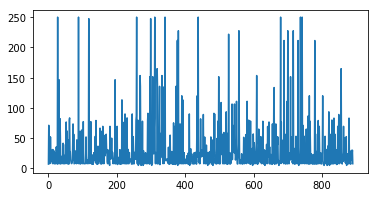

In [70]:
t.fare.plot(figsize=(6,3))
plt.show()

In [71]:
#HEnce the above graph has to a certain extent negated outliers distorsion
t.head(1)

,survived,pclass,sex,age,fare,Family_member,Alone,Alone1,age_cat,fare_cat
0,0,3,male,22.0,7.25,1,No,NO,Adult,very cheap


In [72]:
t.drop(columns=['age','fare','Alone','Alone1','age_cat','fare_cat'],inplace=True)

In [73]:
#Creating dummy variables
#These allow object operations to be analysed in terms of numeric terms.

In [74]:
pd.get_dummies(t,columns=['sex','pclass']).head()

,survived,Family_member,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,1,0,0,1
1,1,1,1,0,1,0,0
2,1,0,1,0,0,0,1
3,1,1,1,0,1,0,0
4,0,0,0,1,0,0,1


In [75]:
pd.get_dummies(t,columns=['sex','pclass'],drop_first=True).head()


,survived,Family_member,sex_male,pclass_2,pclass_3
0,0,1,1,0,1
1,1,1,0,0,0
2,1,0,0,0,1
3,1,1,0,0,0
4,0,0,1,0,1


In [76]:
#USing string Opts

In [77]:
olym.Athlete=olym.Athlete.str.title()

In [78]:
olym.Athlete.str.split(', ',expand=True).head(2)#expand breaks list forms and adapts column format

,0,1,2
0,Hajos,Alfred,None
1,Herschmann,Otto,None


In [79]:
olym.loc[::,'Surname']=olym.Athlete.str.split(', ',expand=True)[0]
olym.loc[::,'first_name']=olym.Athlete.str.split(', ',expand=True)[1]
olym.drop(columns='Athlete',inplace=True)

In [80]:
olym.head(3)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,first_name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios


In [81]:
olym.Surname.str.strip()
olym.first_name.str.strip()
#Stripping values of spaces

0                     Alfred
1                       Otto
2                  Dimitrios
3                    Ioannis
4                   Spiridon
5                 Efstathios
6                     Alfred
7                    Joannis
8                 Efstathios
9                       Paul
10                  Antonios
11                   Francis
12                    Alajos
13                    Thomas
14                     Fritz
15                    Thomas
16                  Grantley
17                     Albin
18                     Edwin
19                    Arthur
20                   Charles
21                    Thomas
22                   Herbert
23                 Dimitrios
24                     Edwin
25                    Nandor
26                  Sotirios
27                    Robert
28                Panagiotis
29                    Ellery
                ...         
31135                 Khetag
31136                 George
31137                 Mijain
31138         

In [82]:
t=pd.read_csv('titanic.csv')
pd.cut(t.fare,[1,20,55,90],right=True,labels=['young','adult','senior']).value_counts()

young     500
adult     237
senior     82
Name: fare, dtype: int64

In [83]:
pd.qcut(t.age,[0,0.30,0.5,0.75,0.9,1]).value_counts()

(0.419, 22.0]    231
(28.0, 38.0]     175
(22.0, 28.0]     131
(38.0, 50.0]     113
(50.0, 80.0]      64
Name: age, dtype: int64

In [84]:
t['age_cat']=pd.cut(t.age,[1,20,55,90],right=False,labels=['young','adult','senior'])

In [85]:
t.groupby(['sex','pclass','age_cat']).age.count()

sex     pclass  age_cat
female  1       young       14
                adult       64
                senior       7
        2       young       16
                adult       56
                senior       2
        3       young       43
                adult       56
                senior       1
male    1       young        6
                adult       74
                senior      20
        2       young       16
                adult       74
                senior       6
        3       young       62
                adult      184
                senior       6
Name: age, dtype: int64

In [86]:
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,young
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,young
